In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
!unzip '/content/drive/My Drive/Covid19Pred/Dataset_kaggle.zip'

Archive:  /content/drive/My Drive/Covid19Pred/Dataset_kaggle.zip
   creating: Dataset_kaggle/
   creating: Dataset_kaggle/COVID/
 extracting: Dataset_kaggle/COVID/Covid (1).png  
  inflating: Dataset_kaggle/COVID/Covid (10).png  
  inflating: Dataset_kaggle/COVID/Covid (100).png  
  inflating: Dataset_kaggle/COVID/Covid (1000).png  
  inflating: Dataset_kaggle/COVID/Covid (1001).png  
  inflating: Dataset_kaggle/COVID/Covid (1002).png  
  inflating: Dataset_kaggle/COVID/Covid (1003).png  
  inflating: Dataset_kaggle/COVID/Covid (1004).png  
  inflating: Dataset_kaggle/COVID/Covid (1005).png  
  inflating: Dataset_kaggle/COVID/Covid (1006).png  
  inflating: Dataset_kaggle/COVID/Covid (1007).png  
  inflating: Dataset_kaggle/COVID/Covid (1008).png  
  inflating: Dataset_kaggle/COVID/Covid (1009).png  
  inflating: Dataset_kaggle/COVID/Covid (101).png  
  inflating: Dataset_kaggle/COVID/Covid (1010).png  
  inflating: Dataset_kaggle/COVID/Covid (1011).png  
  inflating: Dataset_kaggle/CO

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
yes=os.listdir('/content/Dataset_kaggle/COVID')
no=os.listdir('/content/Dataset_kaggle/non-COVID')

In [ ]:
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)

True

In [ ]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])

In [ ]:
data_target

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
data

array(['Covid (801).png', 'Covid (842).png', 'Covid (866).png', ...,
       'Non-Covid (902).png', 'Non-Covid (1108).png',
       'Non-Covid (721).png'], dtype='<U20')

In [ ]:
yes_values=os.listdir('/content/Dataset_kaggle/COVID')
no_values=os.listdir('/content/Dataset_kaggle/non-COVID')

In [ ]:
X_data =[]
for file in yes_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('/content/Dataset_kaggle/COVID/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [ ]:
for file in no_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('/content/Dataset_kaggle/non-COVID/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [ ]:
X = np.squeeze(X_data)

In [ ]:
# normalize data
X = X.astype('float32')
X /= 255

In [ ]:
data_target

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
len(data)

2481

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X, data_target, test_size=0.2, random_state=0)

In [ ]:
y_test

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        3904      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        20752     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 36)          4

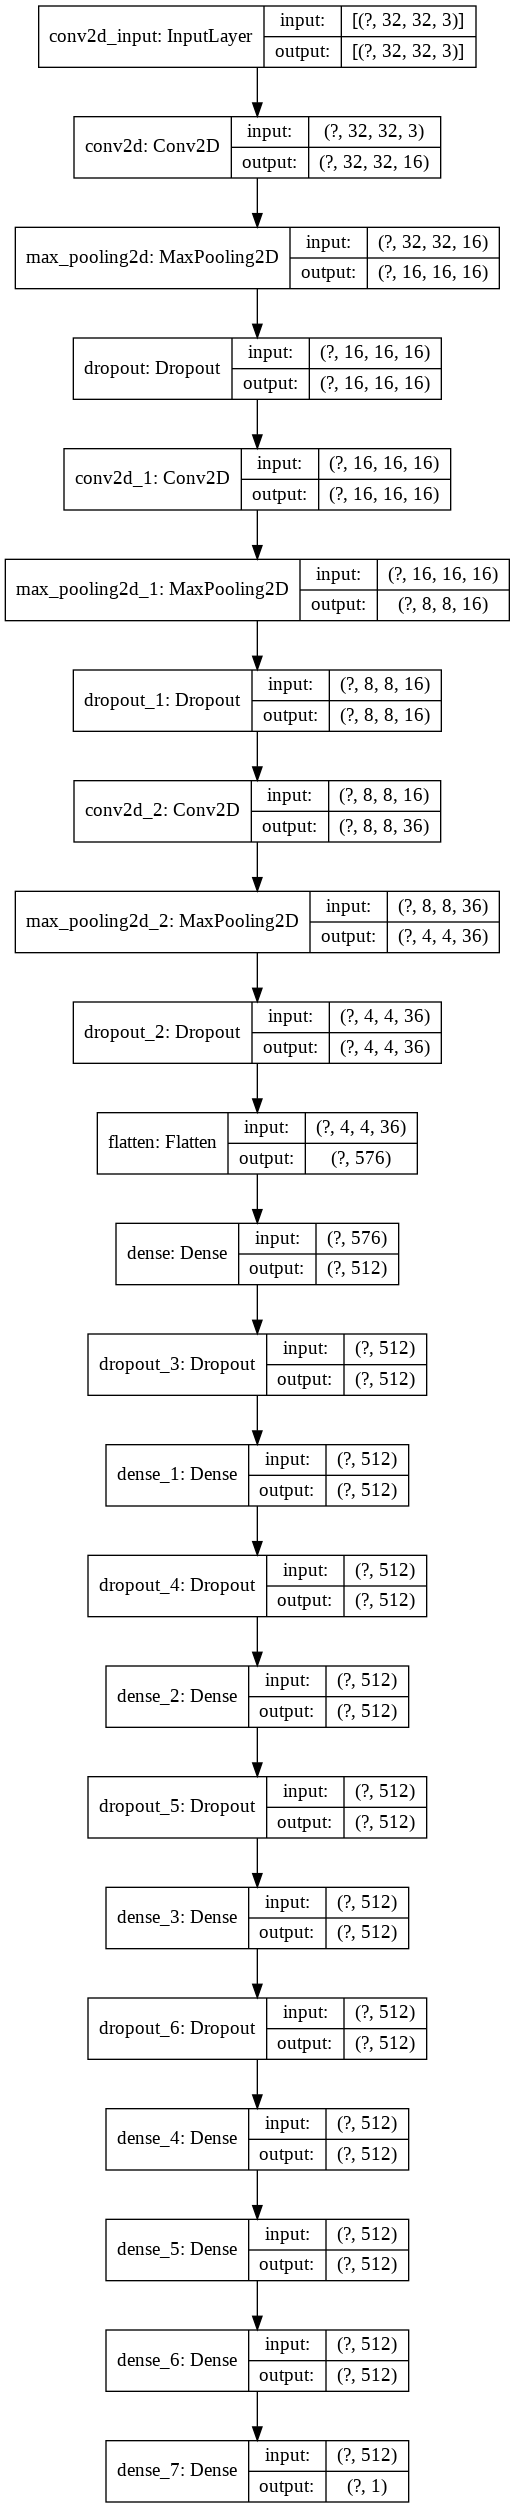

In [ ]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Take a look at the model summary
model.summary()
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True)

In [ ]:
 model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [ ]:
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=1000,
         validation_data=(x_test, y_test))

Epoch 1/1000
16/16 [==============================] - 1s 32ms/step - loss: 0.6968 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5010
Epoch 2/1000
16/16 [==============================] - 0s 9ms/step - loss: 0.6940 - acc: 0.4914 - val_loss: 0.6932 - val_acc: 0.4990
Epoch 3/1000
16/16 [==============================] - 0s 10ms/step - loss: 0.6934 - acc: 0.4955 - val_loss: 0.6933 - val_acc: 0.5010
Epoch 4/1000
16/16 [==============================] - 0s 9ms/step - loss: 0.6931 - acc: 0.5055 - val_loss: 0.6930 - val_acc: 0.5010
Epoch 5/1000
16/16 [==============================] - 0s 9ms/step - loss: 0.6934 - acc: 0.4955 - val_loss: 0.6932 - val_acc: 0.4990
Epoch 6/1000
16/16 [==============================] - 0s 9ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5010
Epoch 7/1000
16/16 [==============================] - 0s 9ms/step - loss: 0.6915 - acc: 0.5055 - val_loss: 0.7153 - val_acc: 0.5010
Epoch 8/1000
16/16 [==============================] - 0s 9ms/step - loss: 

In [ ]:

# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])



 Test accuracy: 0.9336016178131104


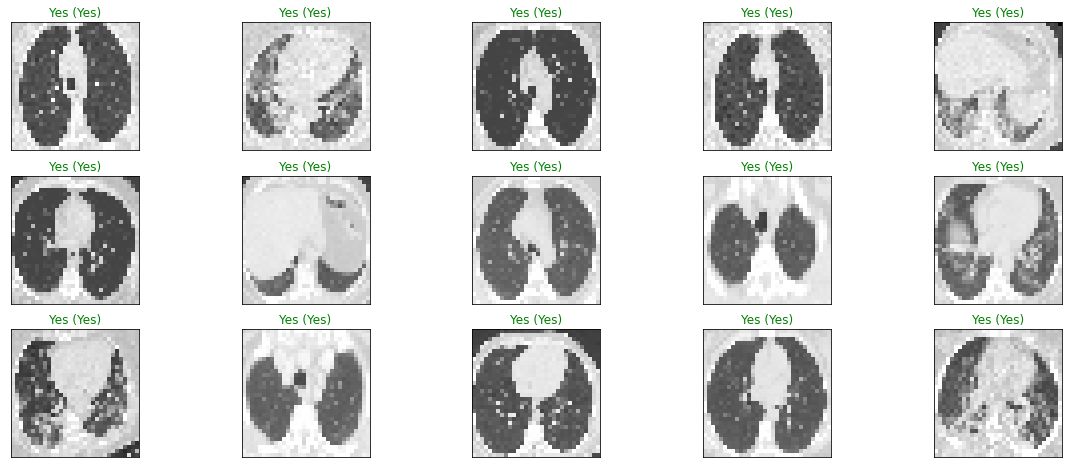

In [ ]:
y_hat = model.predict(x_test)
labels =["Yes",  # index 0
        "No",      # index 1
        ]
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[2], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(y_test, y_hat.round()))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_hat)
print(metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       248
           1       0.91      0.96      0.94       249

    accuracy                           0.93       497
   macro avg       0.93      0.93      0.93       497
weighted avg       0.93      0.93      0.93       497

0.9865105583624821


In [ ]:
#from keras.models import load_model
#model.save('CoronaV3.h5')

In [ ]:
!pip install keract

In [ ]:
def preprocess_image(img_path, model=None, rescale=255, resize=(256, 256)):
    """
    Preprocesses a given image for prediction with a trained model, with rescaling and resizing options
    
    Arguments:
            img_path: The path to the image file
            rescale: A float or integer indicating required rescaling. 
                    The image array will be divided (scaled) by this number.
            resize: A tuple indicating desired target size. 
                    This should match the input shape as expected by the model
    Returns:
            img: A processed image.
    """
    from keras.preprocessing.image import img_to_array, load_img
    import cv2
    import numpy as np

    assert type(img_path) == str, "Image path must be a string"
    assert (
        type(rescale) == int or type(rescale) == float
    ), "Rescale factor must be either a float or int"
    assert (
        type(resize) == tuple and len(resize) == 2
    ), "Resize target must be a tuple with two elements"

    img = load_img(img_path)
    img = img_to_array(img)
    img = img / float(rescale)
    img = cv2.resize(img, resize)
    if model != None:
        if len(model.input_shape) == 4:
            img = np.expand_dims(img, axis=0)

    return img
from keract import display_activations,get_activations
# The image path
img_path = '/content/Dataset_kaggle/COVID/Covid (100).png'
# Preprocessing the image for the model
x = preprocess_image(img_path=img_path,model=model,resize=(224,224))
# Generate the activations 
activations = get_activations(model, x)

conv2d_input (1, 224, 224, 3) 


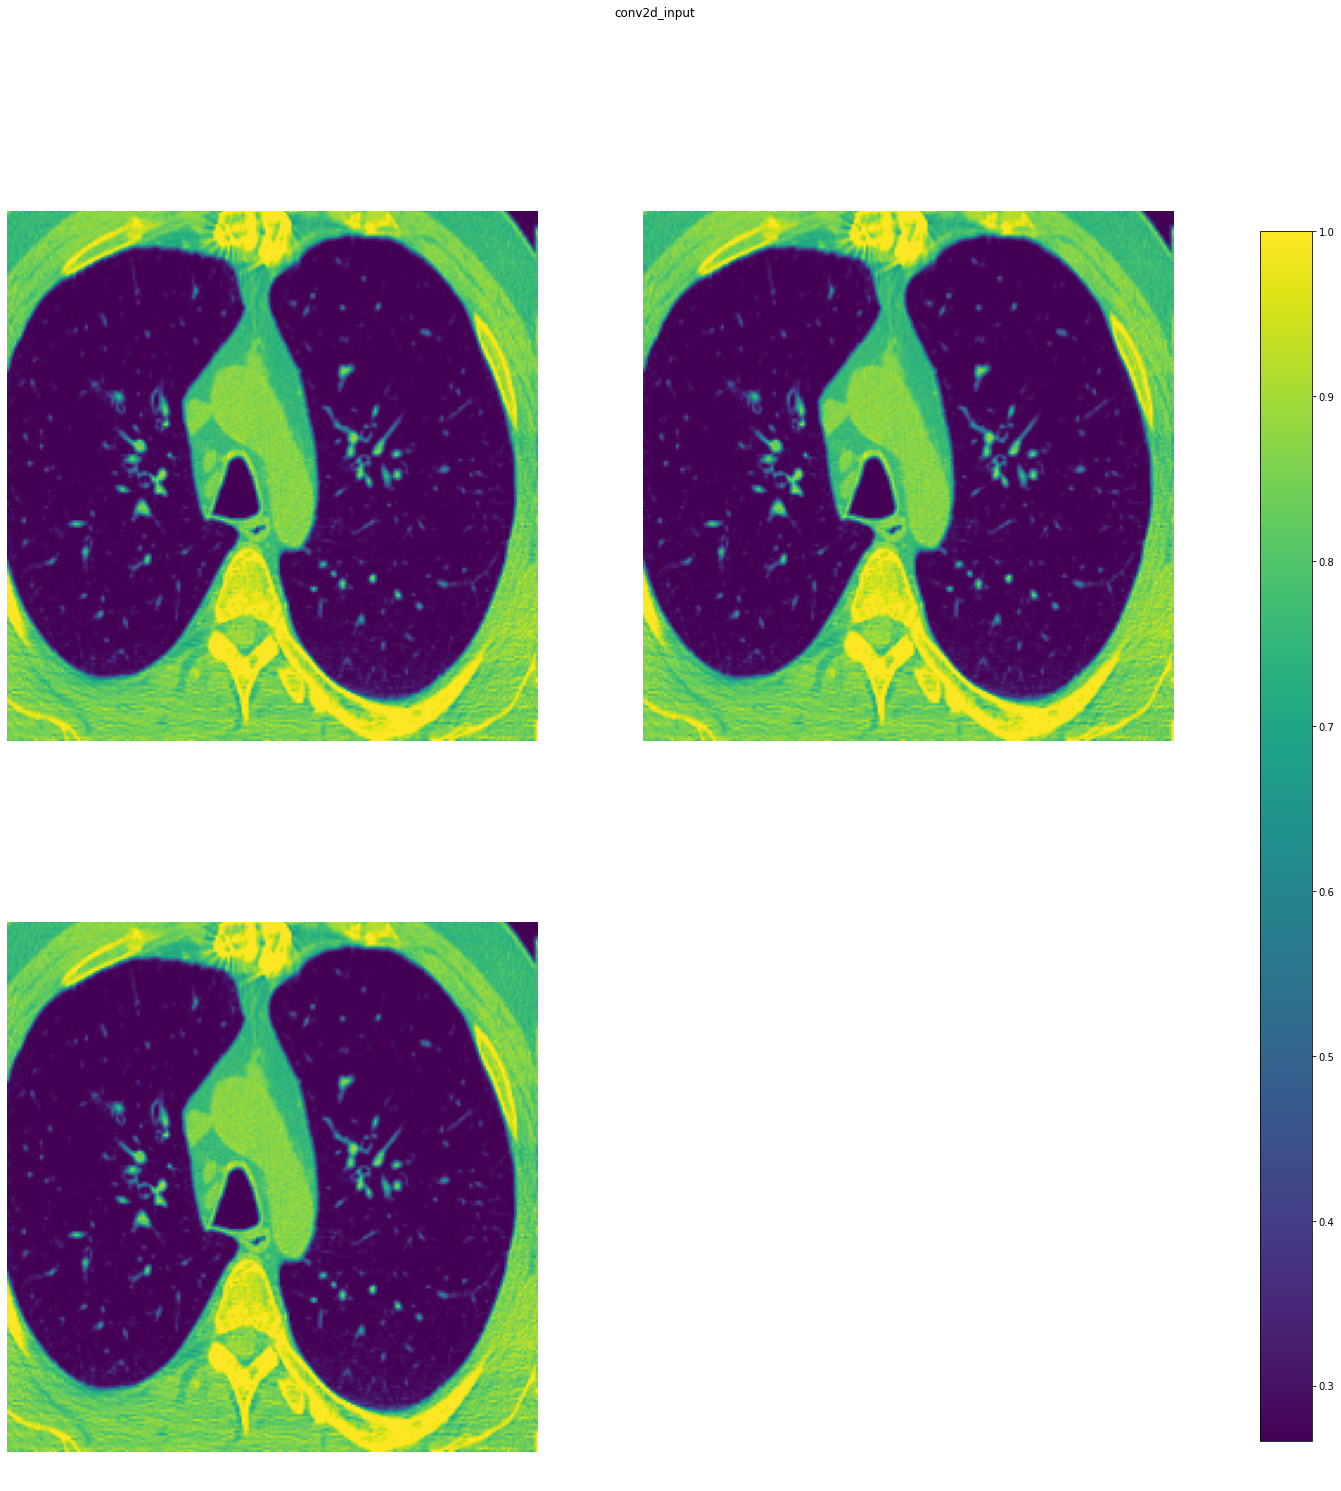

conv2d (1, 224, 224, 16) 


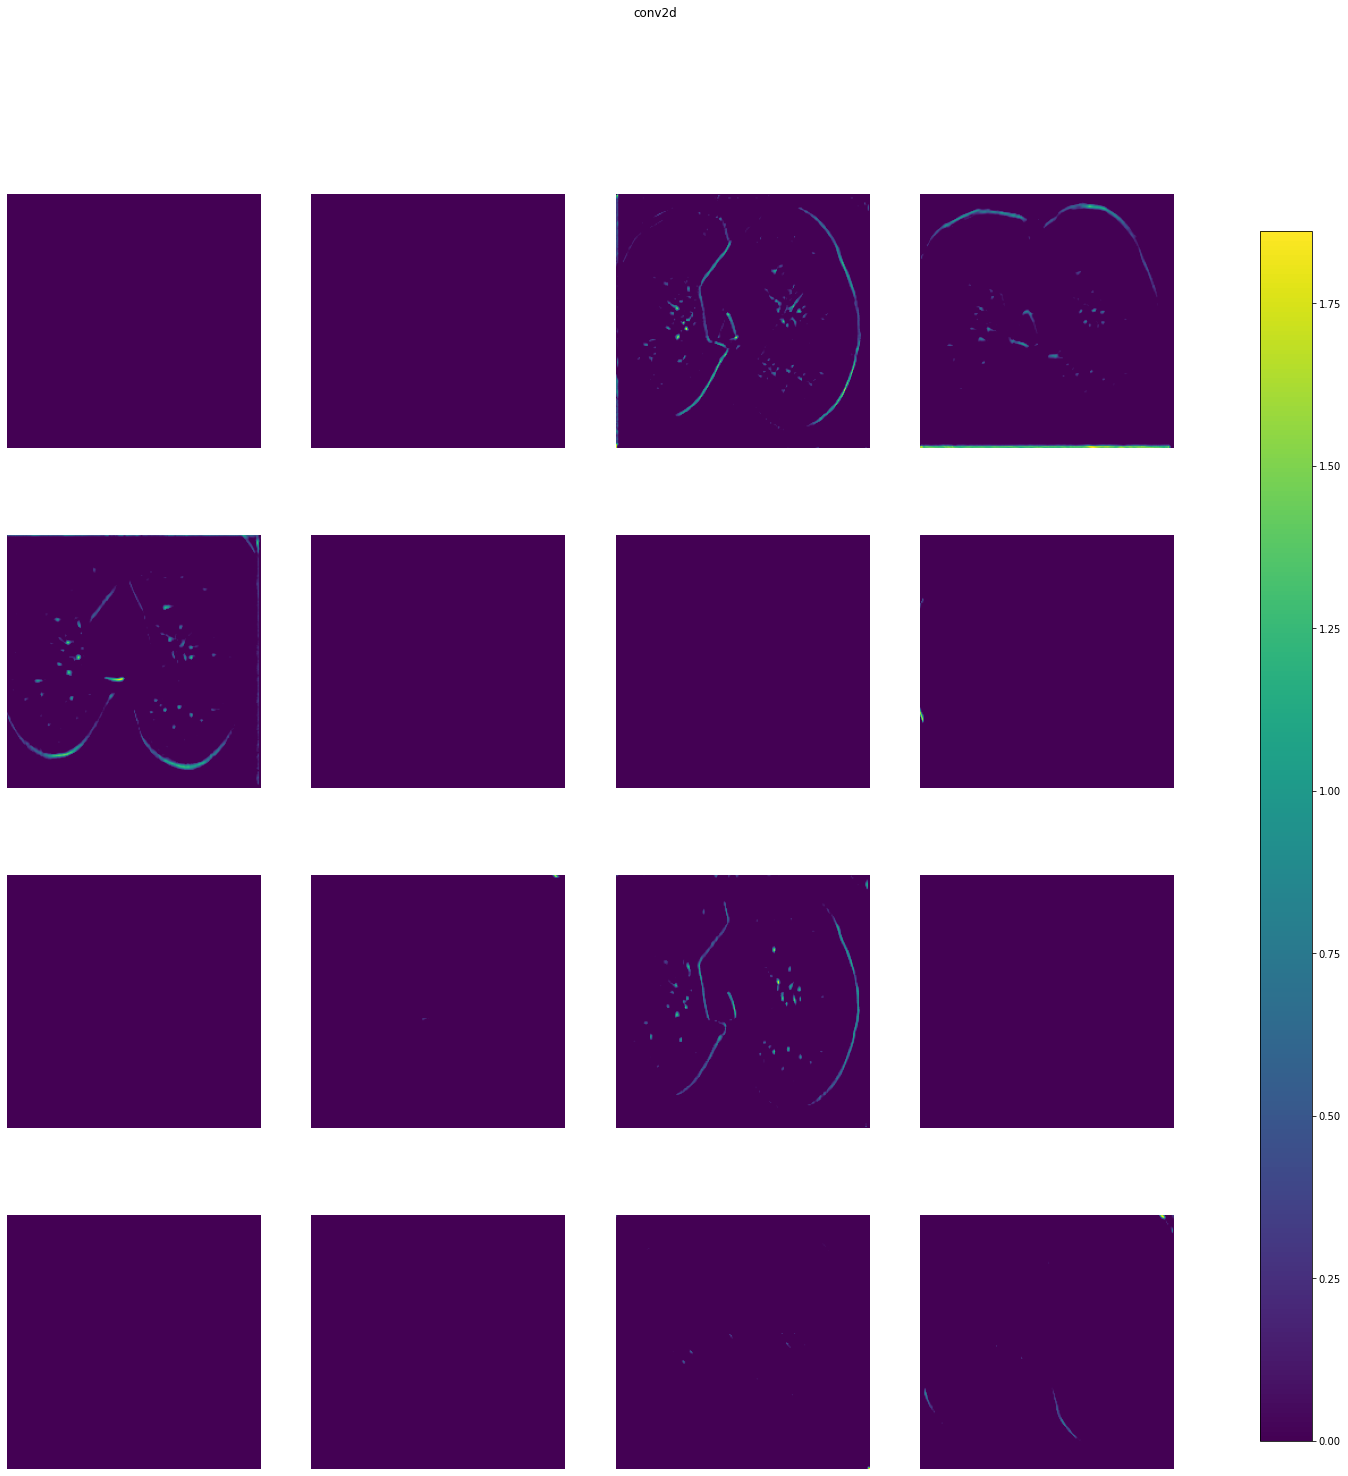

max_pooling2d (1, 112, 112, 16) 


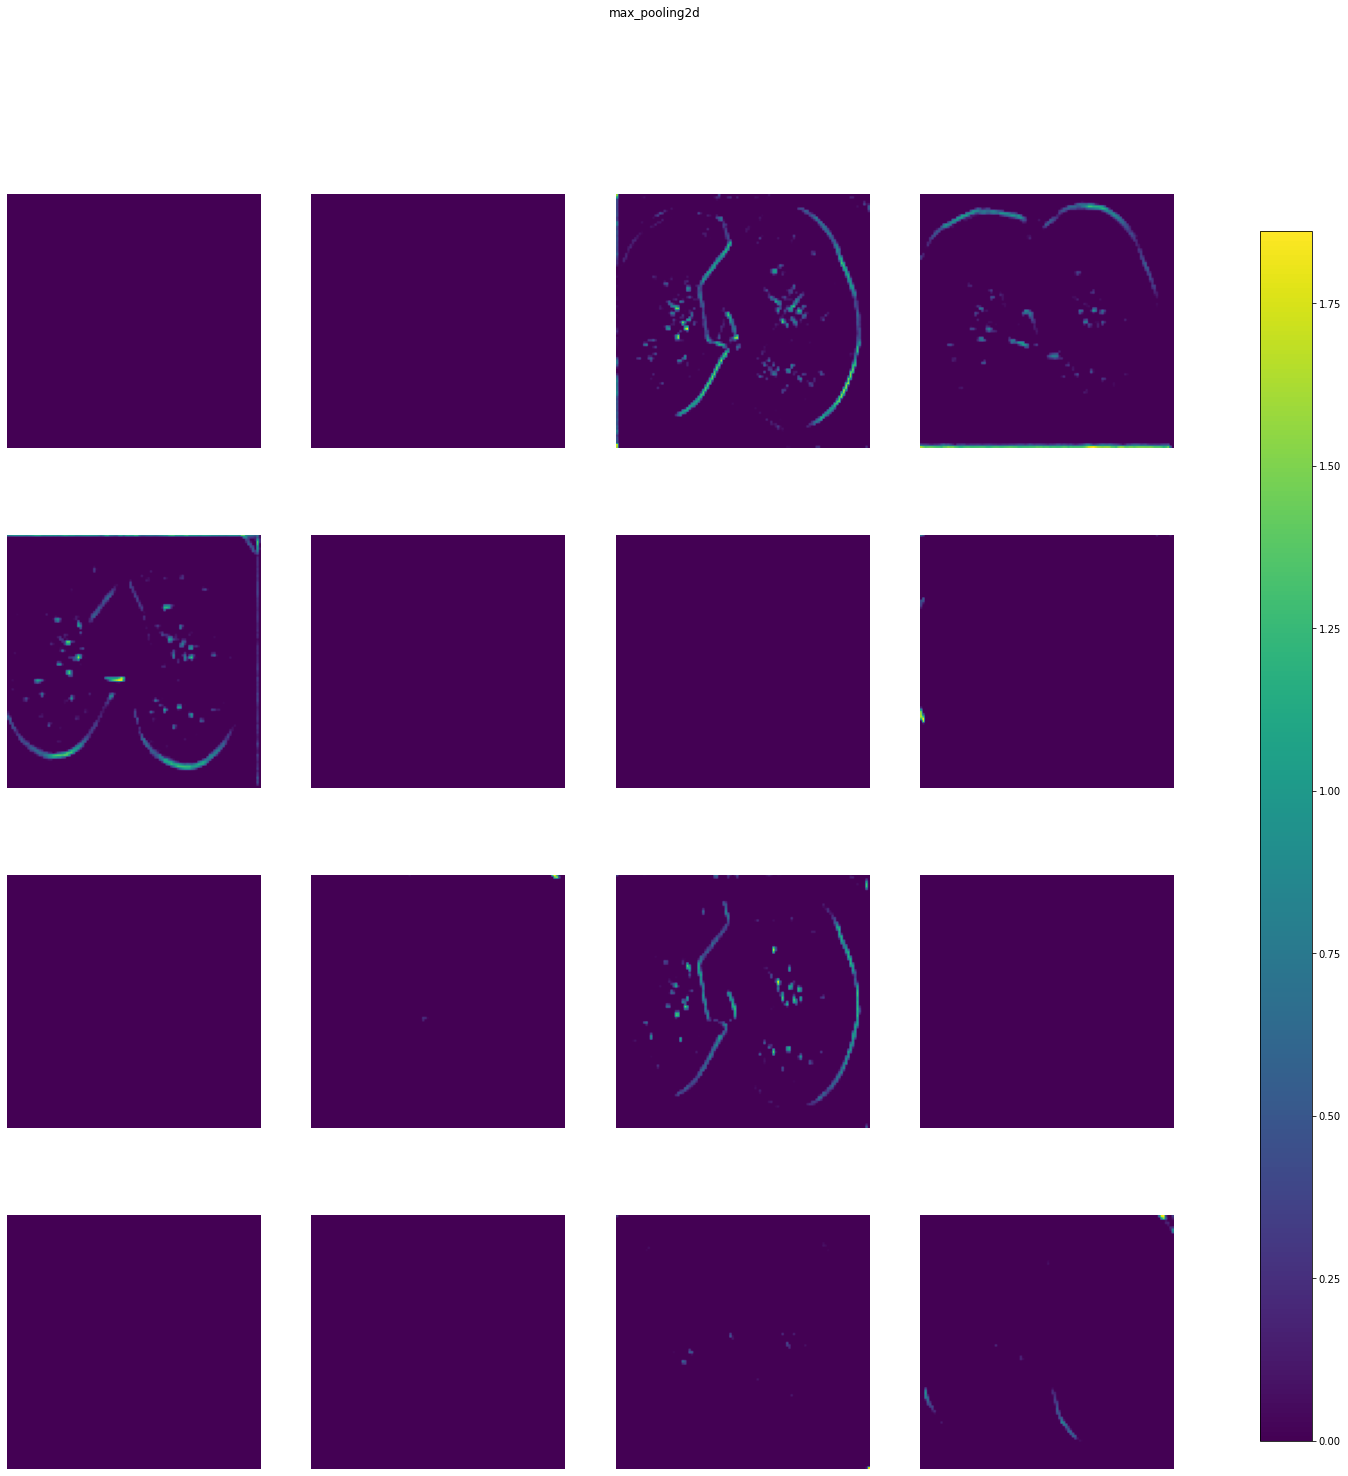

dropout (1, 112, 112, 16) 


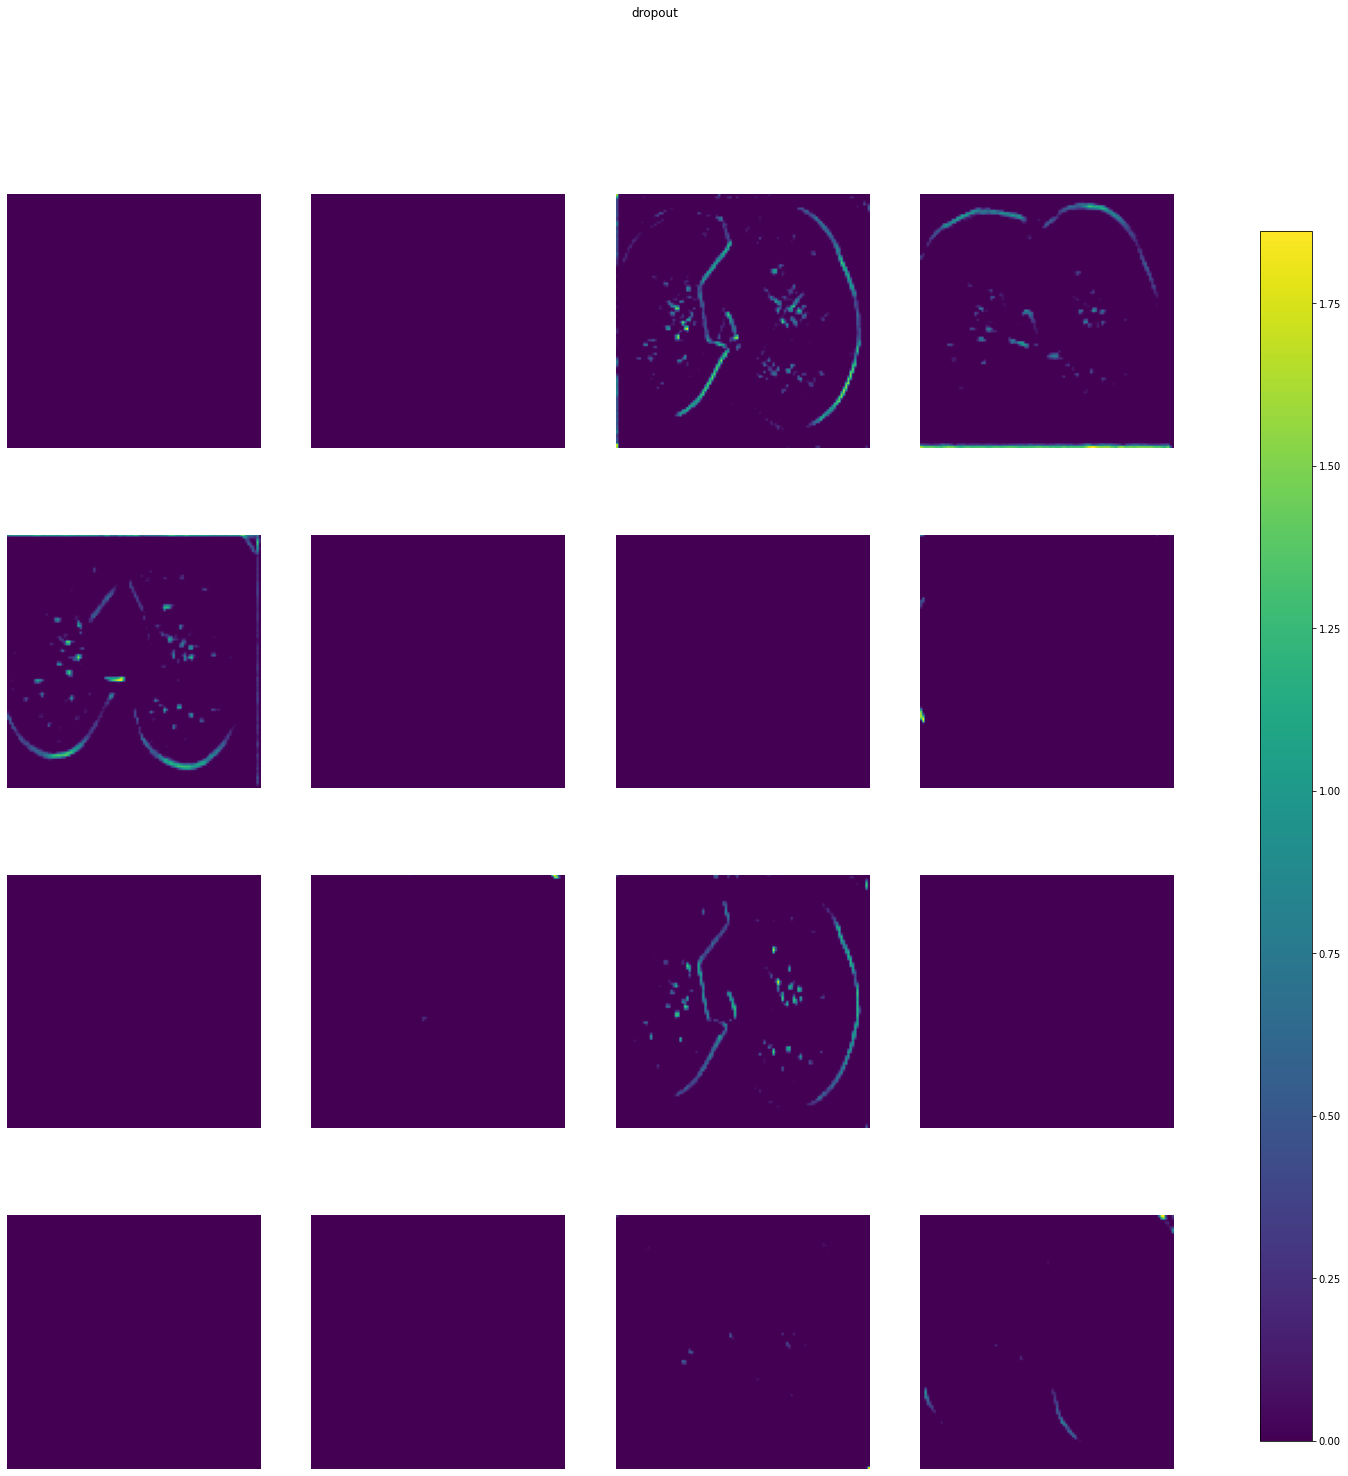

conv2d_1 (1, 112, 112, 16) 


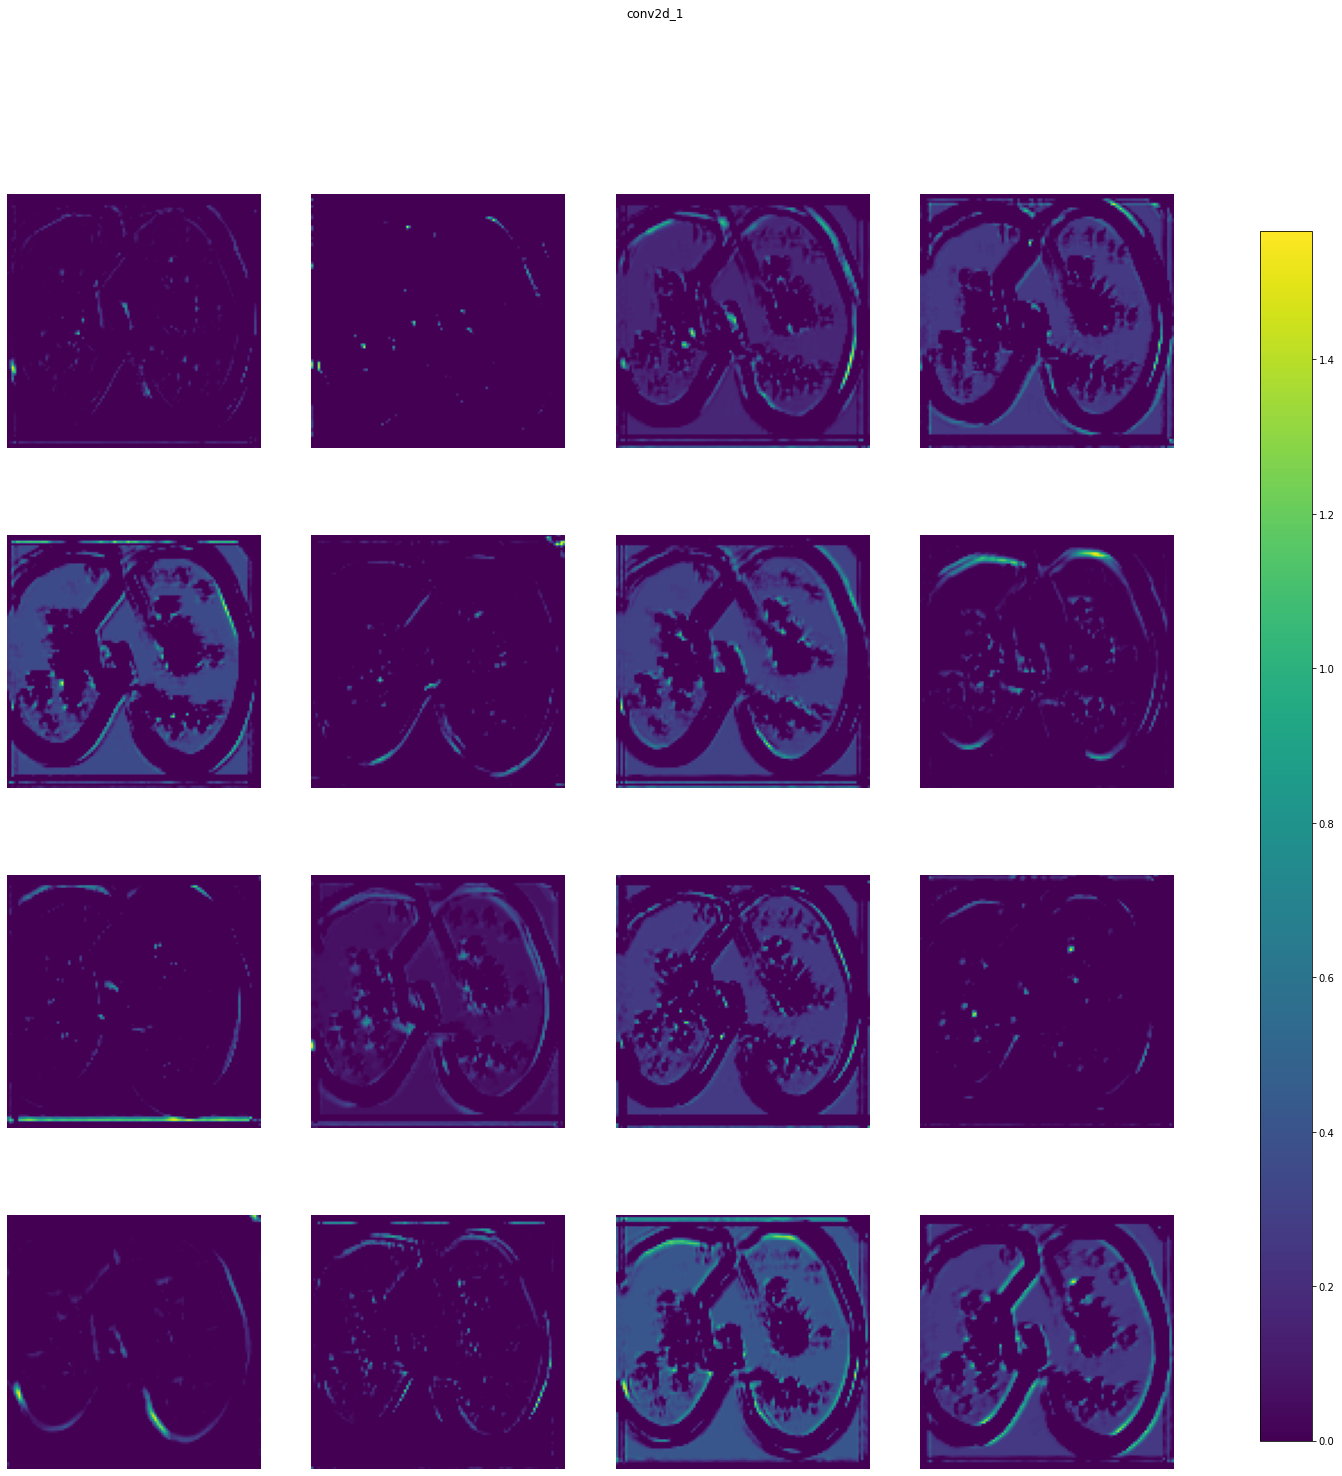

max_pooling2d_1 (1, 56, 56, 16) 


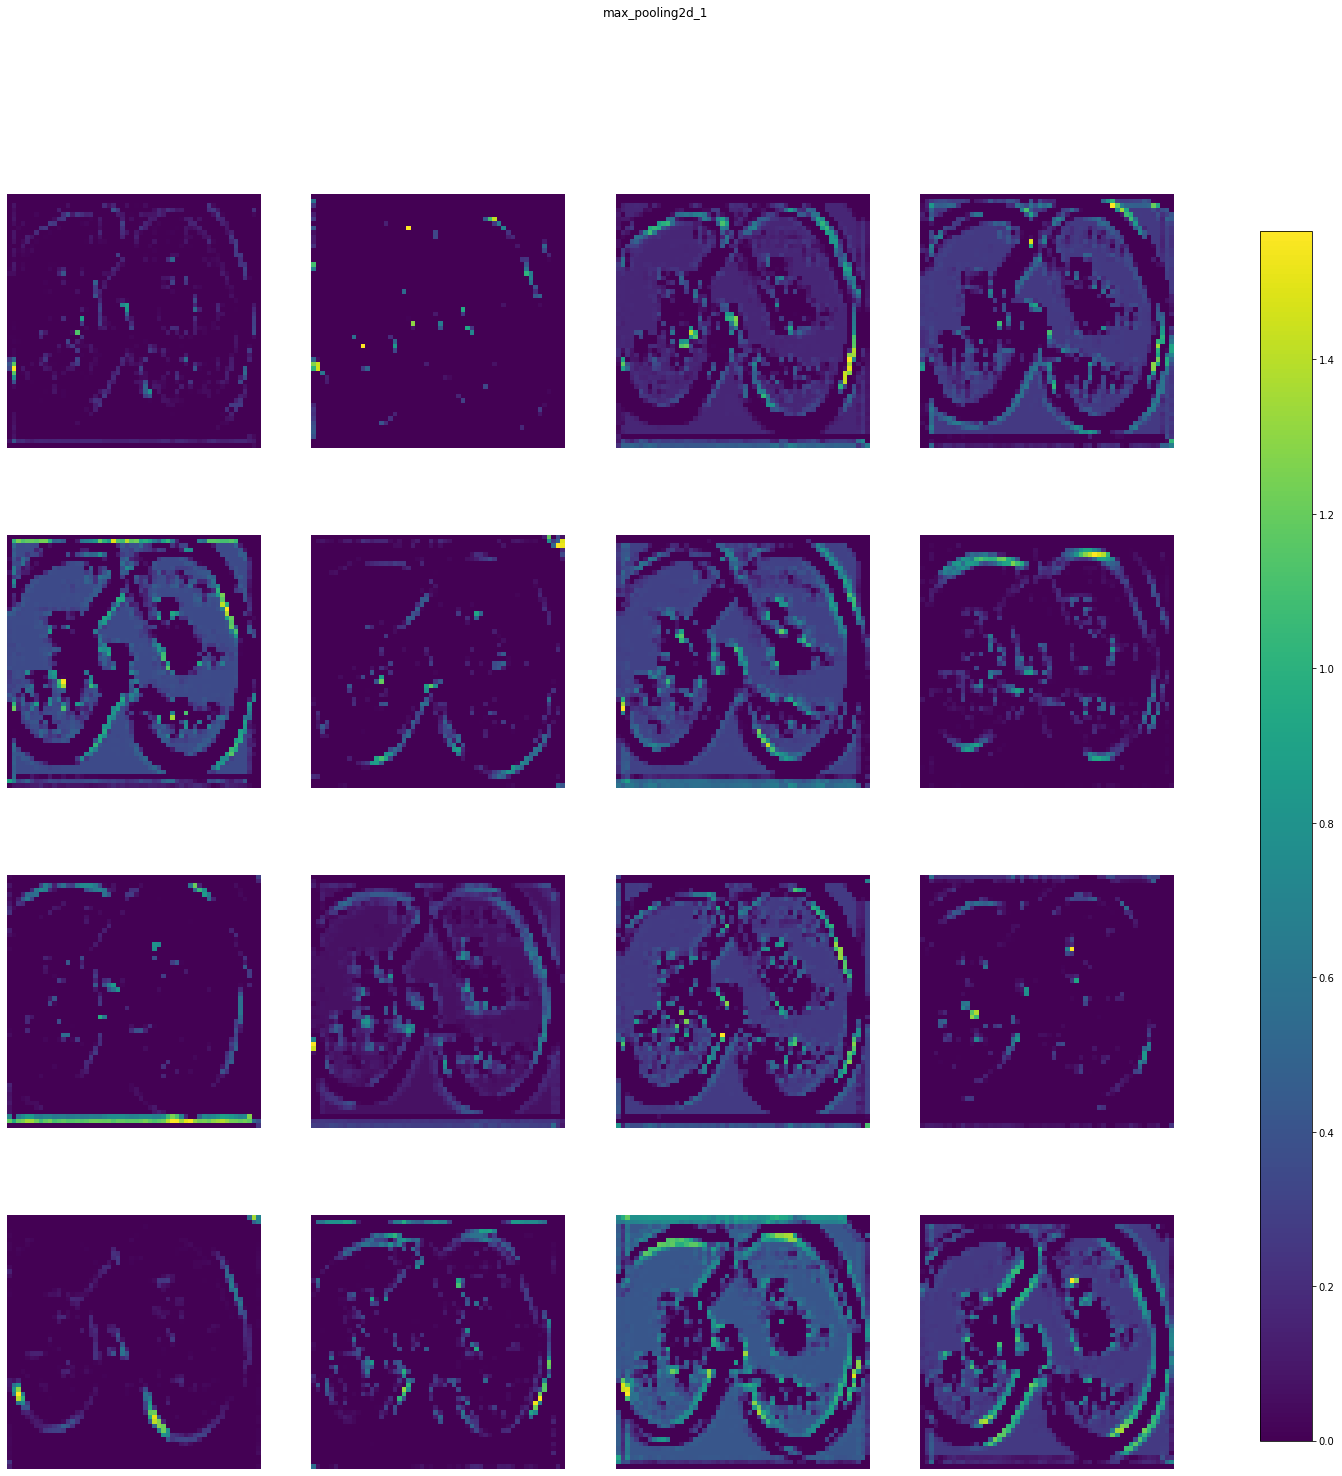

dropout_1 (1, 56, 56, 16) 


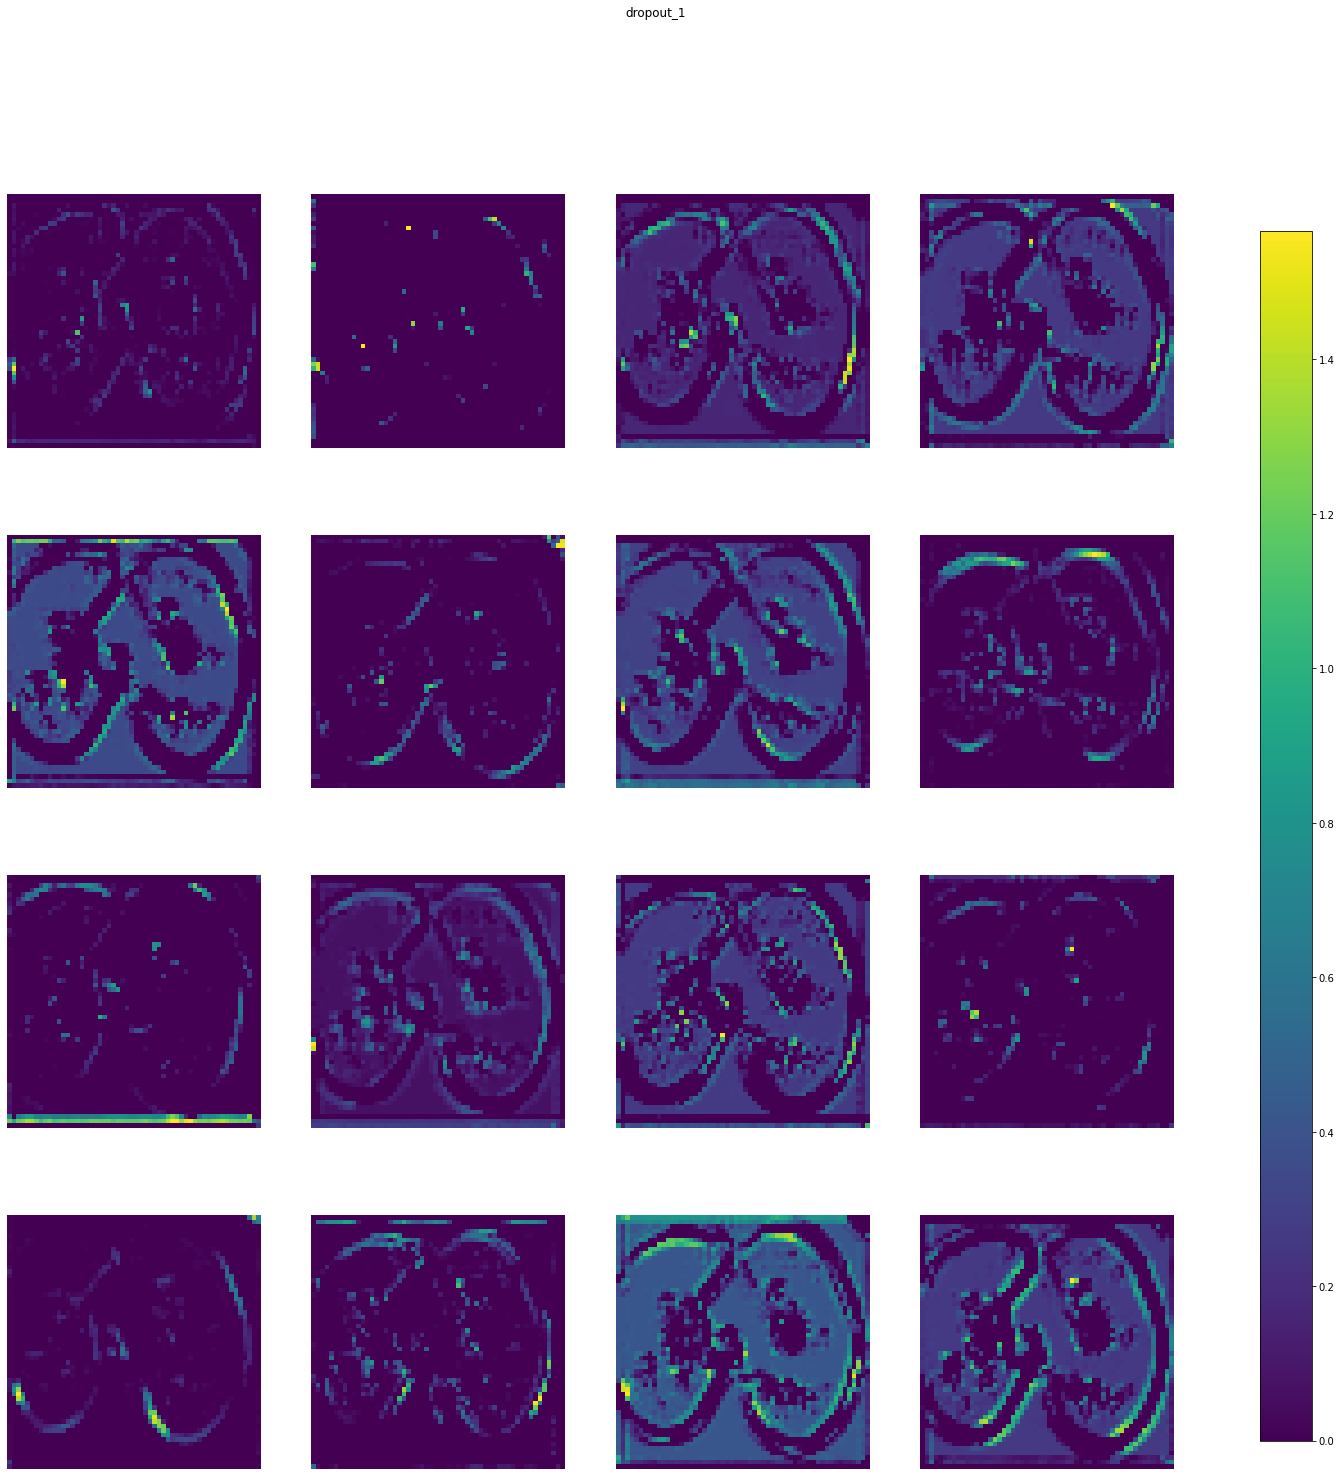

conv2d_2 (1, 56, 56, 36) 


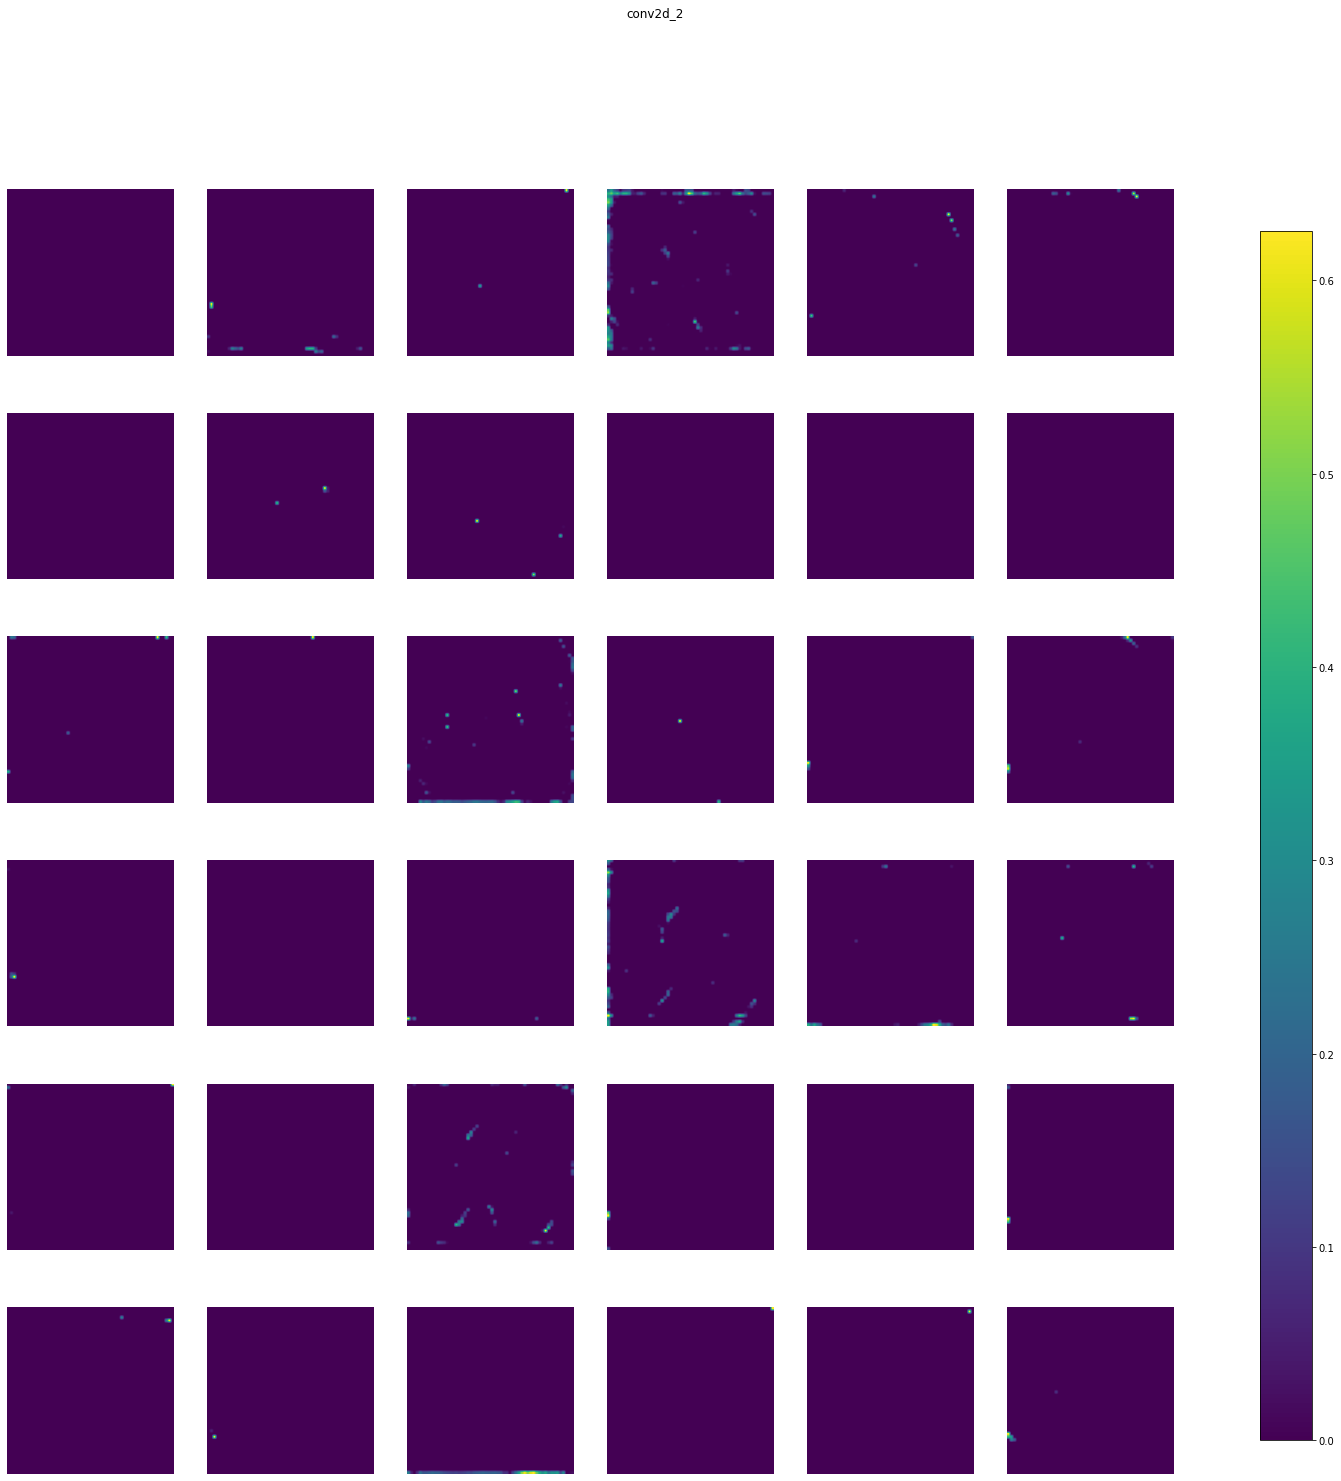

max_pooling2d_2 (1, 28, 28, 36) 


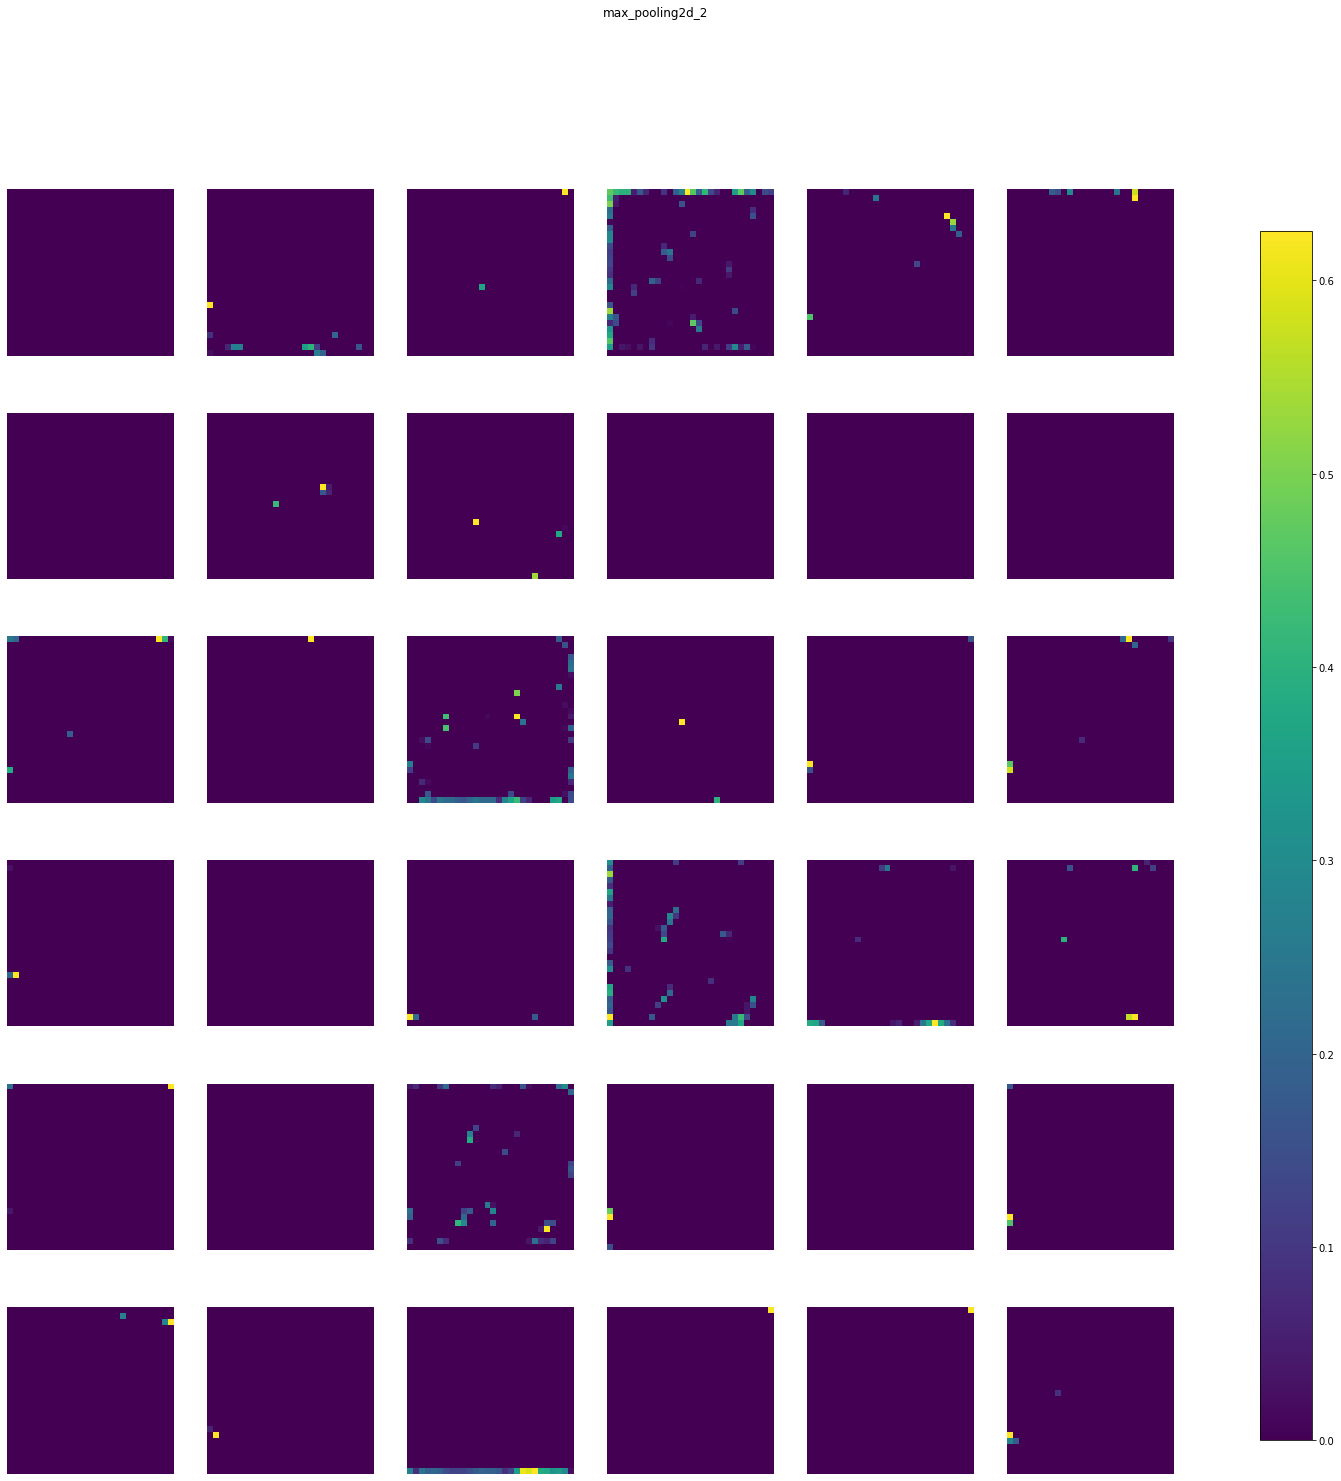

dropout_2 (1, 28, 28, 36) 


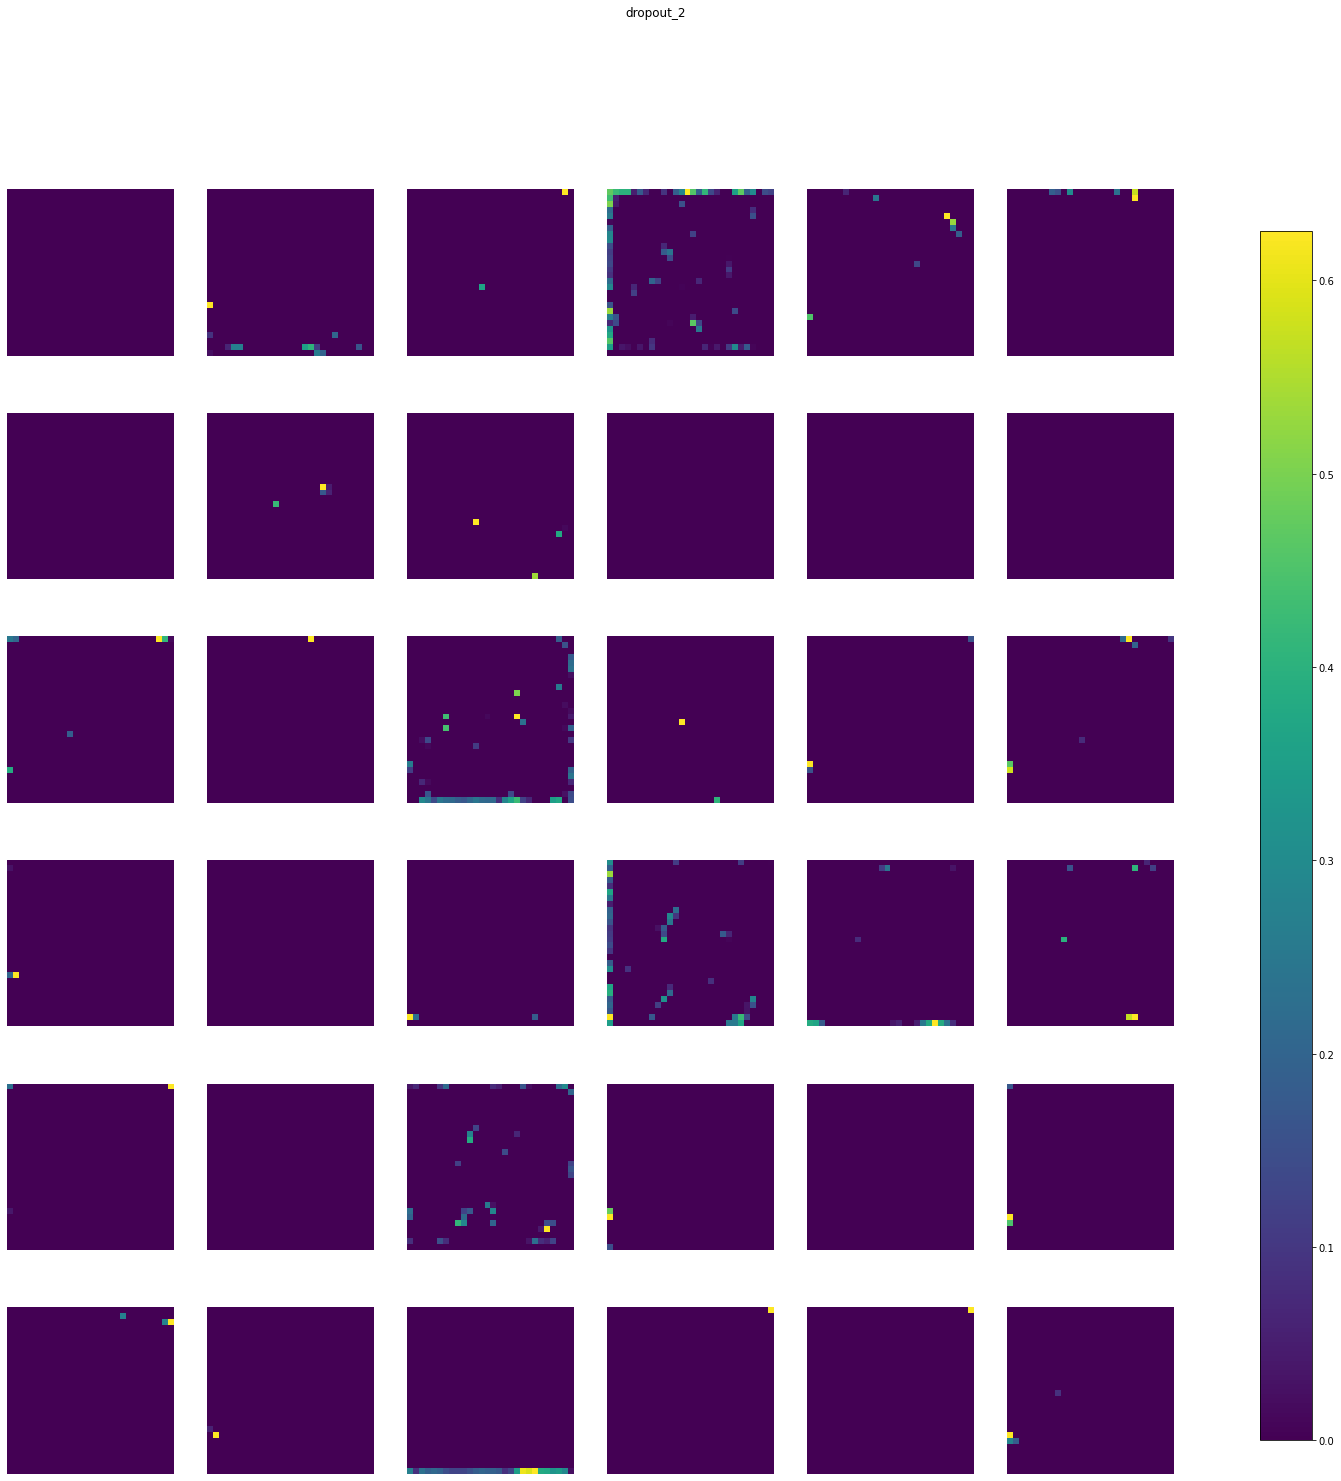

flatten (49, 576) -> Skipped. First dimension is not 1.
dense (49, 512) -> Skipped. First dimension is not 1.
dropout_3 (49, 512) -> Skipped. First dimension is not 1.
dense_1 (49, 512) -> Skipped. First dimension is not 1.
dropout_4 (49, 512) -> Skipped. First dimension is not 1.
dense_2 (49, 512) -> Skipped. First dimension is not 1.
dropout_5 (49, 512) -> Skipped. First dimension is not 1.
dense_3 (49, 512) -> Skipped. First dimension is not 1.
dropout_6 (49, 512) -> Skipped. First dimension is not 1.
dense_4 (49, 512) -> Skipped. First dimension is not 1.
dense_5 (49, 512) -> Skipped. First dimension is not 1.
dense_6 (49, 512) -> Skipped. First dimension is not 1.
dense_7 (49, 1) -> Skipped. First dimension is not 1.


In [ ]:
display_activations(activations, save=False)

In [ ]:
from keract import display_heatmaps

conv2d_input (1, 224, 224, 3) 


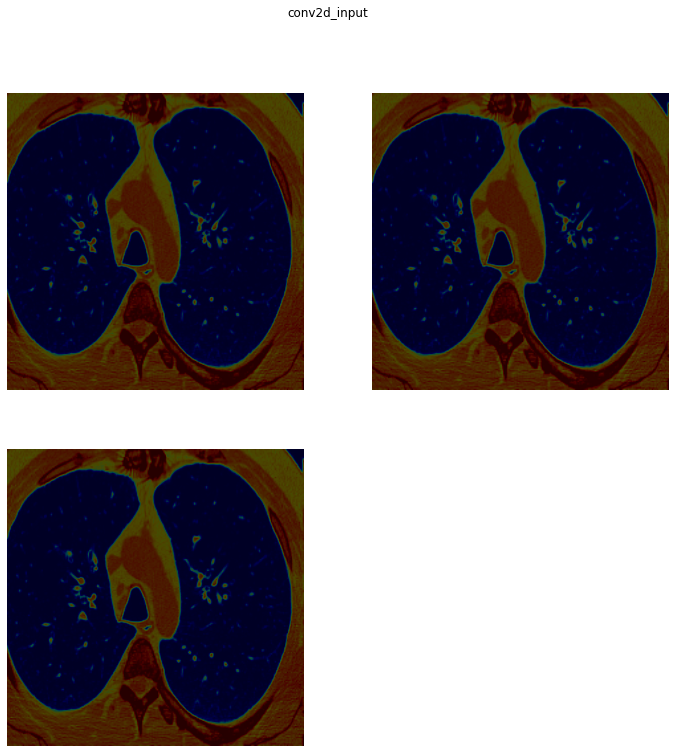

conv2d (1, 224, 224, 16) 


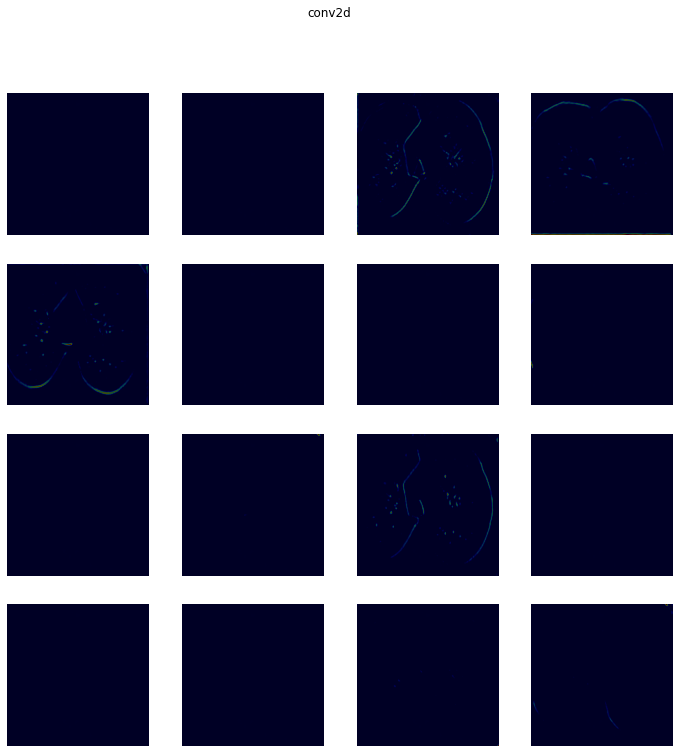

max_pooling2d (1, 112, 112, 16) 


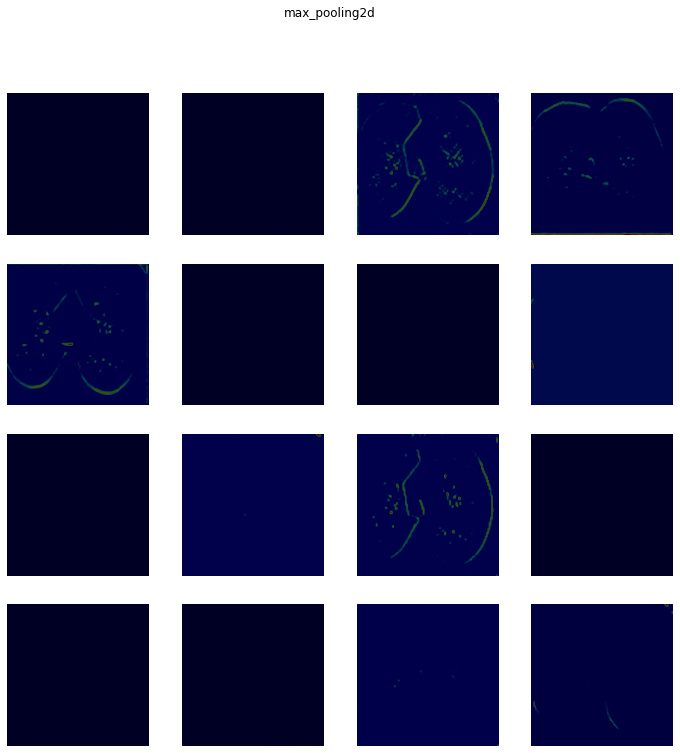

dropout (1, 112, 112, 16) 


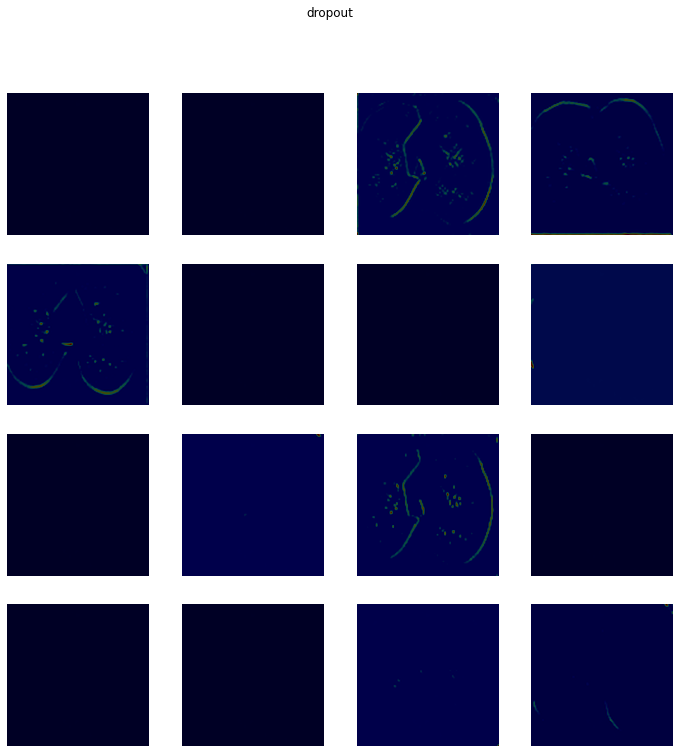

conv2d_1 (1, 112, 112, 16) 


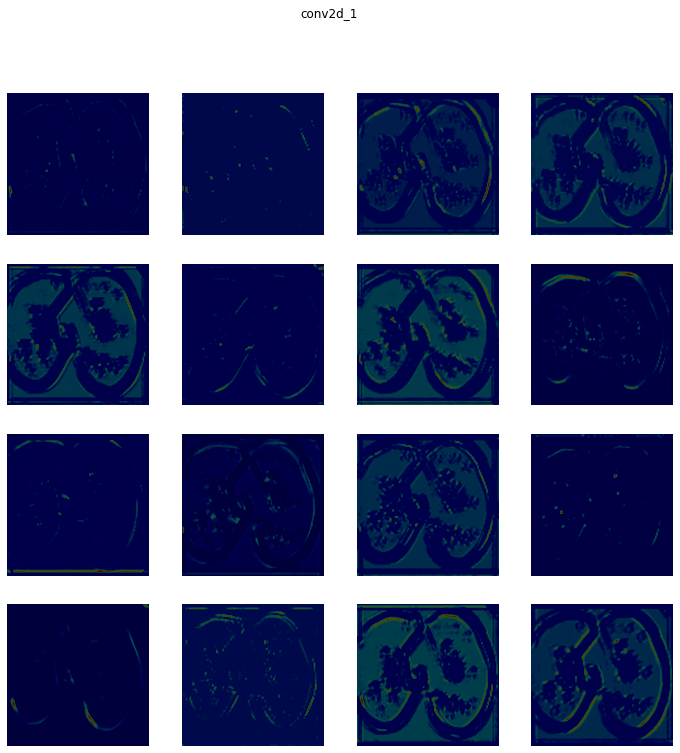

max_pooling2d_1 (1, 56, 56, 16) 


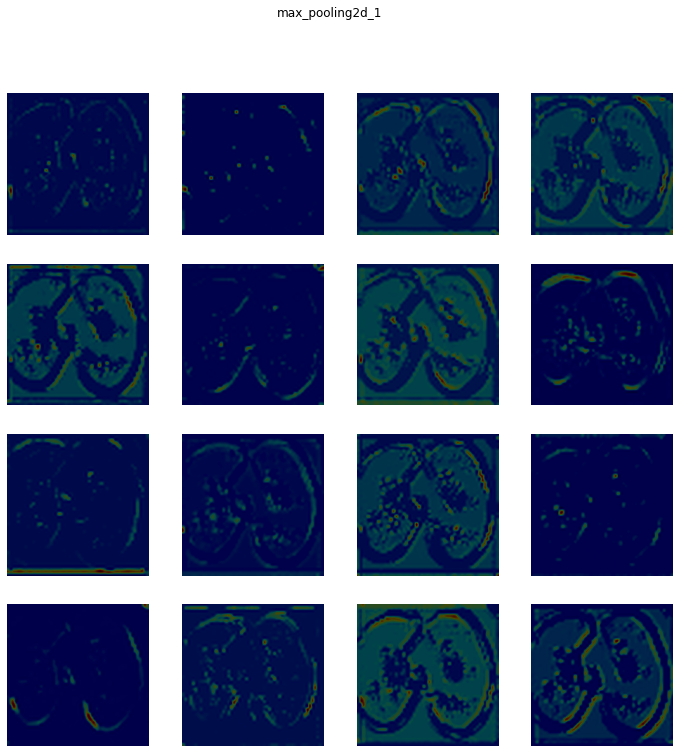

dropout_1 (1, 56, 56, 16) 


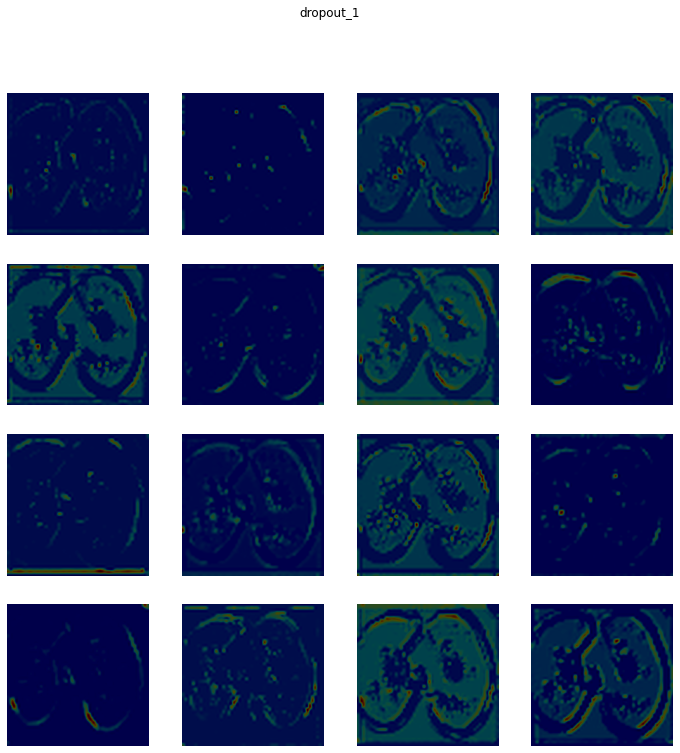

conv2d_2 (1, 56, 56, 36) 


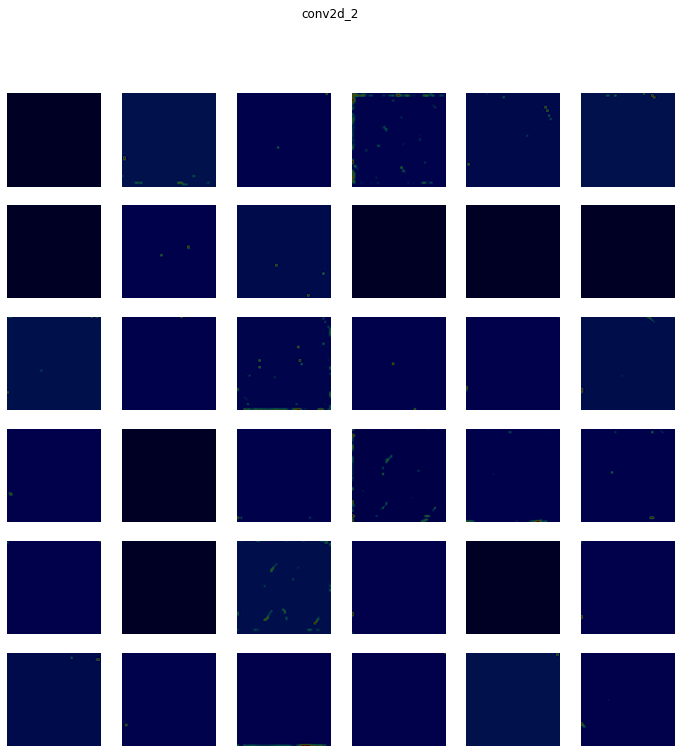

max_pooling2d_2 (1, 28, 28, 36) 


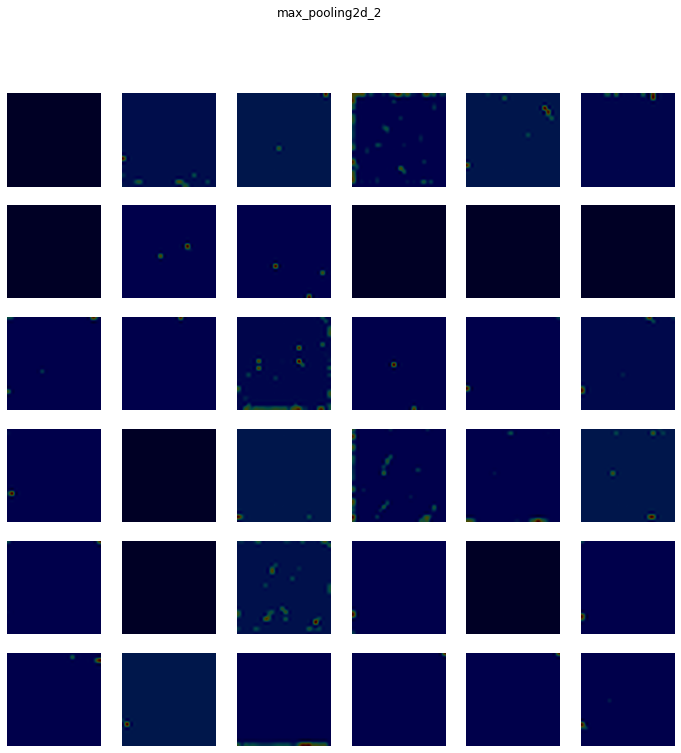

dropout_2 (1, 28, 28, 36) 


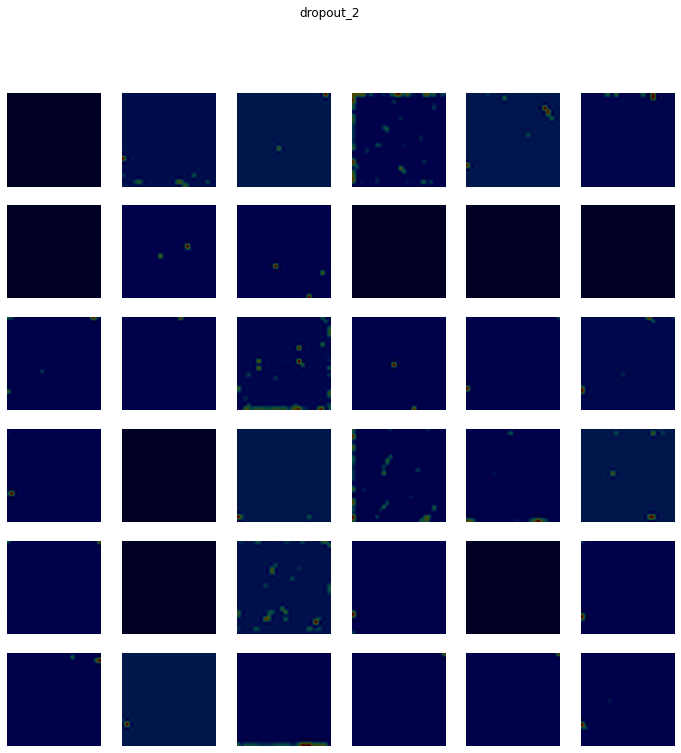

flatten (49, 576) -> Skipped. First dimension is not 1.
dense (49, 512) -> Skipped. First dimension is not 1.
dropout_3 (49, 512) -> Skipped. First dimension is not 1.
dense_1 (49, 512) -> Skipped. First dimension is not 1.
dropout_4 (49, 512) -> Skipped. First dimension is not 1.
dense_2 (49, 512) -> Skipped. First dimension is not 1.
dropout_5 (49, 512) -> Skipped. First dimension is not 1.
dense_3 (49, 512) -> Skipped. First dimension is not 1.
dropout_6 (49, 512) -> Skipped. First dimension is not 1.
dense_4 (49, 512) -> Skipped. First dimension is not 1.
dense_5 (49, 512) -> Skipped. First dimension is not 1.
dense_6 (49, 512) -> Skipped. First dimension is not 1.
dense_7 (49, 1) -> Skipped. First dimension is not 1.


In [ ]:
display_heatmaps(activations,x, save=False)

In [ ]:
! pip install git+git://github.com/raghakot/keras-vis.git --upgrade --no-deps

  Cloning git://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-cu69m1ec
  Running command git clone -q git://github.com/raghakot/keras-vis.git /tmp/pip-req-build-cu69m1ec
  Created wheel for keras-vis: filename=keras_vis-0.5.0-py2.py3-none-any.whl size=38884 sha256=a950453ce3be3d00fc99ecba9d8b28d8e8f362057a78dc7ed02eb01f1b4f38fd
  Stored in directory: /tmp/pip-ephem-wheel-cache-uffzq6dh/wheels/ff/01/8e/3a66d951f9b53f9894a010107b05253fb9a6c6f2555a5aaeca
Successfully built keras-vis
  Found existing installation: keras-vis 0.4.1
    Uninstalling keras-vis-0.4.1:
      Successfully uninstalled keras-vis-0.4.1


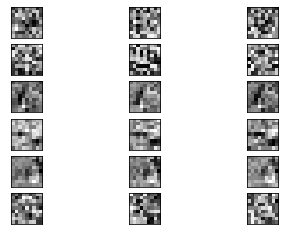

In [ ]:

filters, biases = model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.show()